<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/07.%20Week%207/Boosting_or_Bagging_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading


In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
df_automobile = pd.read_csv('Automobile.csv')

from google.colab import files
uploaded = files.upload()
df_boston = pd.read_csv('BostonHousing.csv')

from google.colab import files
uploaded = files.upload()
df_infrared = pd.read_csv('Infrared.csv')

display(df_automobile.head())
display(df_boston.head())
display(df_infrared.head())

Saving Automobile.csv to Automobile (1).csv


Saving BostonHousing.csv to BostonHousing.csv


Saving Infrared.csv to Infrared.csv


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


## Data exploration


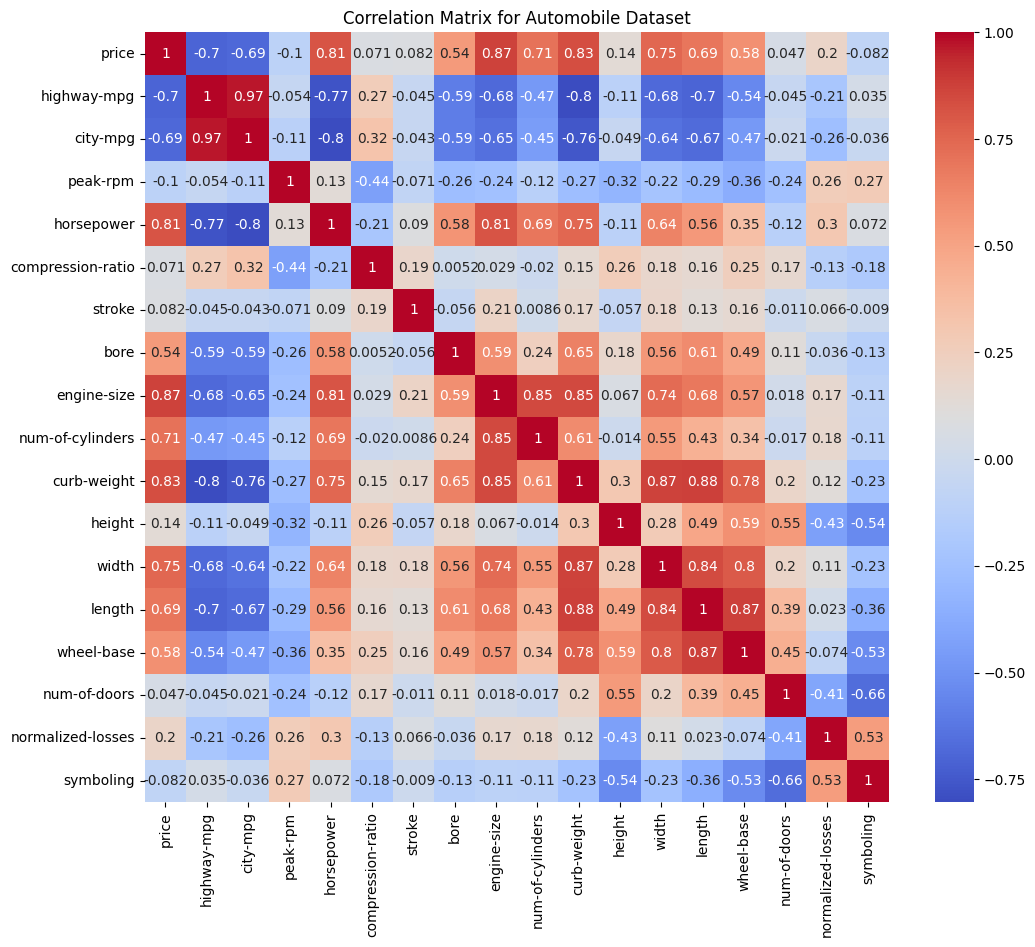

Target variable for Automobile Dataset: price


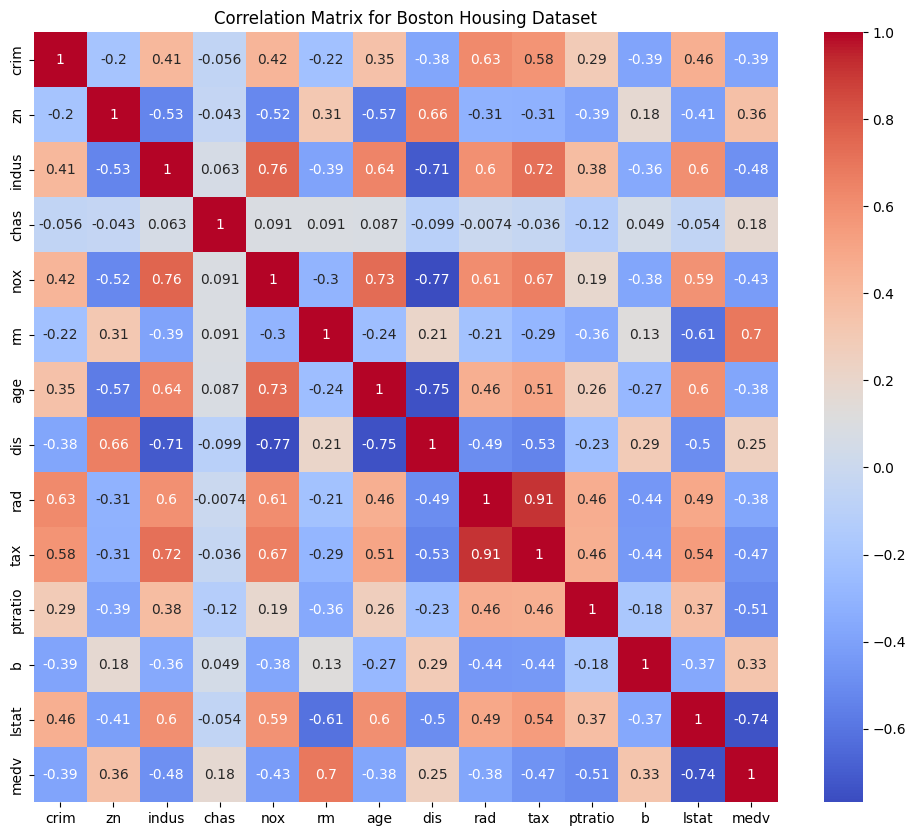

Target variable for Boston Housing Dataset: medv


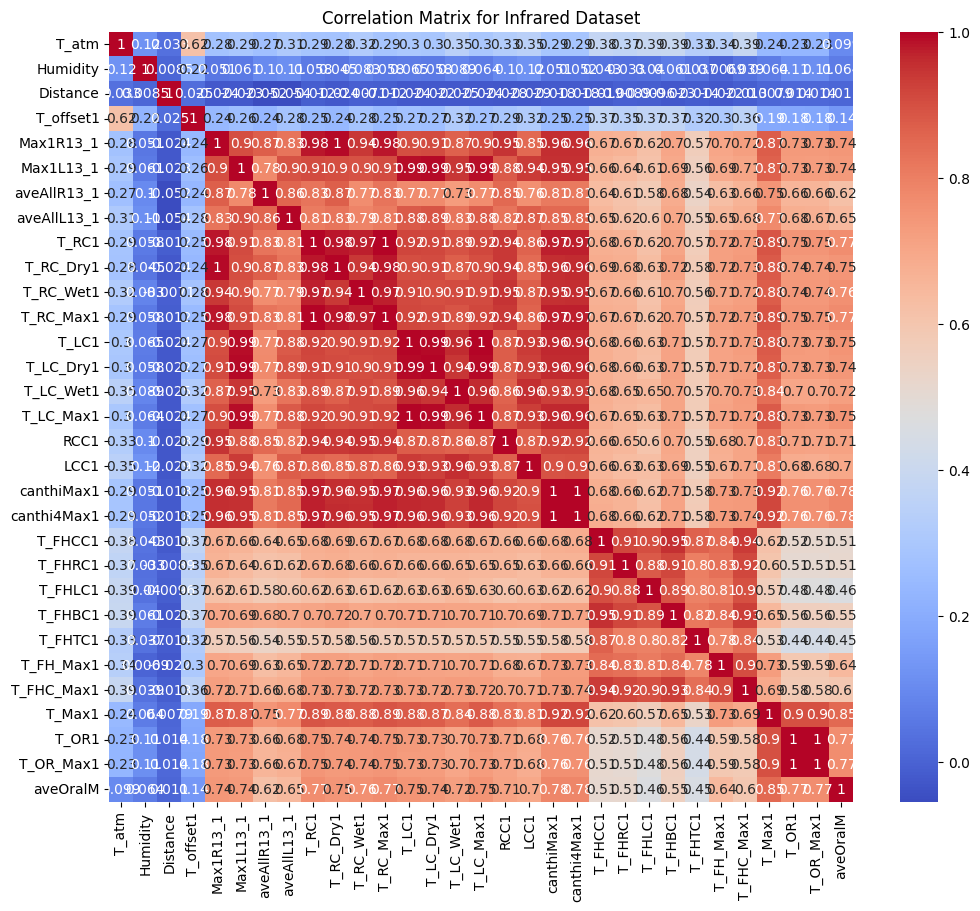

Target variable for Infrared Dataset: T_Max1

Summary of Findings:

Automobile Dataset:
Key Observations:
- Contains a mix of numerical and categorical features.
- Missing values in 'price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'num-of-doors', and 'normalized-losses'.
- Numerical features show varying distributions (some skewed).
- Target variable: 'price' was chosen because it represents the dependent variable, the price of a car, and is often the primary factor in buying decisions.

Boston Housing Dataset:
Key Observations:
- Primarily numerical features.
- No missing values.
- Numerical features exhibit a mix of distributions.
- Target variable: 'medv' (median house value) was chosen as the target variable. It is the natural outcome or target for prediction in housing price datasets.

Infrared Dataset:
Key Observations:
- Contains a mix of numerical and categorical features.
- Few missing values present in 'Distance'.
- Numerical features show various distributions.
- Target 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code blocks)

# Correlation Analysis (corrected)
def correlation_analysis(df, df_name, target_variable):
    # Select only numerical features for correlation
    numerical_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(12, 10))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {df_name}')
    plt.show()
    print(f"Target variable for {df_name}: {target_variable}")


correlation_analysis(df_automobile, "Automobile Dataset", "price")
correlation_analysis(df_boston, "Boston Housing Dataset", "medv")
correlation_analysis(df_infrared, "Infrared Dataset", "T_Max1")


# Summary
print("\nSummary of Findings:")

print("\nAutomobile Dataset:")
print("Key Observations:")
print("- Contains a mix of numerical and categorical features.")
print("- Missing values in 'price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'num-of-doors', and 'normalized-losses'.")
print("- Numerical features show varying distributions (some skewed).")
# Add more observations from the analysis results
print("- Target variable: 'price' was chosen because it represents the dependent variable, the price of a car, and is often the primary factor in buying decisions.")

print("\nBoston Housing Dataset:")
print("Key Observations:")
print("- Primarily numerical features.")
print("- No missing values.")
print("- Numerical features exhibit a mix of distributions.")
# Add more observations from the analysis results
print("- Target variable: 'medv' (median house value) was chosen as the target variable. It is the natural outcome or target for prediction in housing price datasets.")

print("\nInfrared Dataset:")
print("Key Observations:")
print("- Contains a mix of numerical and categorical features.")
print("- Few missing values present in 'Distance'.")
print("- Numerical features show various distributions.")
# Add more observations from the analysis results
print("- Target variable: 'T_Max1' is selected as the target variable. It is likely the maximal temperature from a infrared measurement.")


## Data cleaning



In [3]:
import pandas as pd
import numpy as np

# --- df_automobile ---
# Handle missing values
for col in ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'num-of-doors', 'normalized-losses']:
    if df_automobile[col].dtype == 'object':
        df_automobile[col] = df_automobile[col].fillna(df_automobile[col].mode()[0])
    elif df_automobile[col].dtype in ['int64', 'float64']:
        df_automobile[col] = df_automobile[col].fillna(df_automobile[col].median())

# Outlier detection and treatment (example: using IQR for 'price')
Q1 = df_automobile['price'].quantile(0.25)
Q3 = df_automobile['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_automobile['price'] = np.clip(df_automobile['price'], lower_bound, upper_bound)

# Convert data types (example: 'num-of-doors' to numeric)
df_automobile['num-of-doors'] = pd.to_numeric(df_automobile['num-of-doors'], errors='coerce')
df_automobile['num-of-doors'] = df_automobile['num-of-doors'].fillna(df_automobile['num-of-doors'].median())

# Remove duplicates
df_automobile.drop_duplicates(inplace=True)

# --- df_boston ---
# No missing values, but check for outliers in 'medv'
Q1 = df_boston['medv'].quantile(0.25)
Q3 = df_boston['medv'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_boston['medv'] = np.clip(df_boston['medv'], lower_bound, upper_bound)
df_boston.drop_duplicates(inplace=True)

# --- df_infrared ---
# Handle missing values in 'Distance'
df_infrared['Distance'] = df_infrared['Distance'].fillna(df_infrared['Distance'].mean())

# Outlier detection and treatment for 'Distance' (example: using IQR)
Q1 = df_infrared['Distance'].quantile(0.25)
Q3 = df_infrared['Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_infrared['Distance'] = np.clip(df_infrared['Distance'], lower_bound, upper_bound)

# Remove duplicates
df_infrared.drop_duplicates(inplace=True)


display(df_automobile.head())
display(df_boston.head())
display(df_infrared.head())

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,115.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,115.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,115.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


## Data preparation



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- df_automobile ---
# Feature selection
features_auto = ['horsepower', 'engine-size', 'highway-mpg', 'city-mpg', 'curb-weight']
target_auto = 'price'
X_auto = df_automobile[features_auto]
y_auto = df_automobile[target_auto]

# Data scaling
scaler_auto = StandardScaler()
X_auto_scaled = scaler_auto.fit_transform(X_auto)

# Data splitting
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(
    X_auto_scaled, y_auto, test_size=0.2, random_state=42
)

# --- df_boston ---
# Feature selection
features_boston = ['lstat', 'rm', 'ptratio', 'indus', 'tax']
target_boston = 'medv'
X_boston = df_boston[features_boston]
y_boston = df_boston[target_boston]

# Data scaling
scaler_boston = StandardScaler()
X_boston_scaled = scaler_boston.fit_transform(X_boston)

# Data splitting
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(
    X_boston_scaled, y_boston, test_size=0.2, random_state=42
)

# --- df_infrared ---
# Feature selection
features_infrared = ['T_atm', 'Humidity', 'Distance', 'T_offset1', 'T_RC1']
target_infrared = 'T_Max1'
X_infrared = df_infrared[features_infrared]
y_infrared = df_infrared[target_infrared]

# Data scaling
scaler_infrared = StandardScaler()
X_infrared_scaled = scaler_infrared.fit_transform(X_infrared)

# Data splitting
X_train_infrared, X_test_infrared, y_train_infrared, y_test_infrared = train_test_split(
    X_infrared_scaled, y_infrared, test_size=0.2, random_state=42
)

## Model training


In [5]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train Boosting Models
boosting_model_auto = GradientBoostingRegressor(random_state=42)
boosting_model_auto.fit(X_train_auto, y_train_auto)

boosting_model_boston = GradientBoostingRegressor(random_state=42)
boosting_model_boston.fit(X_train_boston, y_train_boston)

boosting_model_infrared = GradientBoostingRegressor(random_state=42)
boosting_model_infrared.fit(X_train_infrared, y_train_infrared)

# Train Bagging Models
bagging_model_auto = RandomForestRegressor(random_state=42)
bagging_model_auto.fit(X_train_auto, y_train_auto)

bagging_model_boston = RandomForestRegressor(random_state=42)
bagging_model_boston.fit(X_train_boston, y_train_boston)

bagging_model_infrared = RandomForestRegressor(random_state=42)
bagging_model_infrared.fit(X_train_infrared, y_train_infrared)

# Store Trained Models
trained_models = {
    'automobile': {'boosting': boosting_model_auto, 'bagging': bagging_model_auto},
    'boston': {'boosting': boosting_model_boston, 'bagging': bagging_model_boston},
    'infrared': {'boosting': boosting_model_infrared, 'bagging': bagging_model_infrared}
}

## Model optimization


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grids
param_grid_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

datasets = {
    'automobile': (X_train_auto, y_train_auto),
    'boston': (X_train_boston, y_train_boston),
    'infrared': (X_train_infrared, y_train_infrared)
}

best_models = {}

for dataset_name, (X_train, y_train) in datasets.items():
    best_models[dataset_name] = {}
    for model_type, model, param_grid in [('boosting', GradientBoostingRegressor(random_state=42), param_grid_boosting),
                                        ('bagging', RandomForestRegressor(random_state=42), param_grid_bagging)]:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[dataset_name][model_type] = grid_search.best_estimator_
        print(f"Best hyperparameters for {model_type} model on {dataset_name} dataset:")
        print(grid_search.best_params_)

Best hyperparameters for boosting model on automobile dataset:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best hyperparameters for bagging model on automobile dataset:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for boosting model on boston dataset:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best hyperparameters for bagging model on boston dataset:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for boosting model on infrared dataset:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best hyperparameters for bagging model on infrared dataset:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n

## Model evaluation


In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import math

results = []

for dataset_name, (X_test, y_test) in [('automobile', (X_test_auto, y_test_auto)),
                                    ('boston', (X_test_boston, y_test_boston)),
                                    ('infrared', (X_test_infrared, y_test_infrared))]:
    for model_type in ['boosting', 'bagging']:
        model = best_models[dataset_name][model_type]
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results.append([dataset_name, model_type, rmse, mse, r2])

df_results = pd.DataFrame(results, columns=['Dataset', 'Model Type', 'RMSE', 'MSE', 'R-squared'])
display(df_results)


,Dataset,Model Type,RMSE,MSE,R-squared
0,automobile,boosting,3746.074036,1.403307e+07,0.734451
1,automobile,bagging,3638.783942,1.324075e+07,0.749444
2,boston,boosting,3.084623,9.514899e+00,0.805521
3,boston,bagging,3.048933,9.295991e+00,0.809995
4,infrared,boosting,0.231258,5.348025e-02,0.768502
5,infrared,bagging,0.236801,5.607458e-02,0.757272


## Mathematical Formulas and Explanations

### RMSE (Root Mean Squared Error)
**Formula:**  
$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}
$$

**Variables:**  
- **n**: Jumlah total data dalam dataset yang digunakan untuk evaluasi.  
- **yi**: Nilai aktual dari variabel target pada data ke-i.  
- **ŷi**: Nilai yang diprediksi oleh model untuk data ke-i.

Penjelasan: RMSE mengukur rata-rata selisih antara nilai prediksi dan nilai aktual dalam satuan yang sama dengan variabel target. Semakin rendah RMSE, semakin baik kecocokan model.

Interpretasi: Nilai yang lebih rendah lebih baik, menunjukkan kesalahan prediksi yang lebih kecil.

Keterbatasan: Sensitif terhadap outlier, karena kesalahan besar akan dikuadratkan.

---

### MSE (Mean Squared Error)
**Formula:**  
$$
MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$

**Variables:**  
- **n**: Jumlah total data dalam dataset yang digunakan untuk evaluasi.  
- **yi**: Nilai aktual dari variabel target pada data ke-i.  
- **ŷi**: Nilai yang diprediksi oleh model untuk data ke-i.  

Penjelasan: MSE menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual. Kuadrat ini menekankan kesalahan yang lebih besar.

Interpretasi: Nilai yang lebih rendah lebih baik; MSE yang lebih kecil menunjukkan akurasi prediksi yang lebih tinggi.

Keterbatasan: Sensitif terhadap outlier, dan satuan dari MSE adalah kuadrat dari satuan variabel target, sehingga interpretasinya kurang intuitif.

---

### R-squared (Coefficient of Determination)
**Formula:**  
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

**Variables:**  
- **SSres (Residual Sum of Squares)**: Jumlah kuadrat dari selisih antara nilai aktual dan nilai prediksi model.  
- **SStot (Total Sum of Squares)**: Jumlah kuadrat dari selisih antara nilai aktual dan rata-rata nilai aktual dalam dataset.

Penjelasan: R² menunjukkan proporsi variansi pada variabel target yang dapat dijelaskan oleh variabel independen. SSres adalah jumlah kuadrat residual (kesalahan), dan SStot adalah jumlah kuadrat total (variansi total).

Interpretasi: Bernilai antara 0 hingga 1. Semakin tinggi nilai R², semakin baik kecocokan model karena lebih banyak variansi yang dapat dijelaskan.

Keterbatasan: Bisa menyesatkan jika digunakan untuk membandingkan model dengan jumlah fitur yang berbeda. Tidak menunjukkan seberapa baik prediksi model.   


## Data visualization


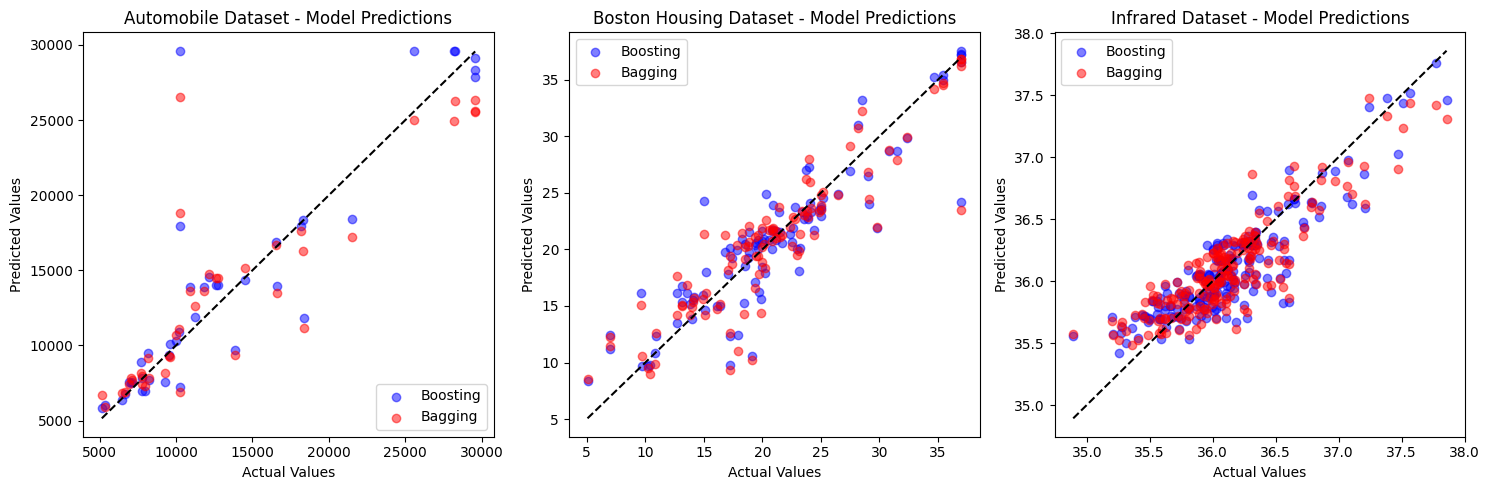

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Automobile Dataset
plt.subplot(1, 3, 1)
plt.scatter(y_test_auto, best_models['automobile']['boosting'].predict(X_test_auto), color='blue', label='Boosting', alpha=0.5)
plt.scatter(y_test_auto, best_models['automobile']['bagging'].predict(X_test_auto), color='red', label='Bagging', alpha=0.5)
plt.plot([min(y_test_auto), max(y_test_auto)], [min(y_test_auto), max(y_test_auto)], color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Automobile Dataset - Model Predictions")
plt.legend()

# Boston Housing Dataset
plt.subplot(1, 3, 2)
plt.scatter(y_test_boston, best_models['boston']['boosting'].predict(X_test_boston), color='blue', label='Boosting', alpha=0.5)
plt.scatter(y_test_boston, best_models['boston']['bagging'].predict(X_test_boston), color='red', label='Bagging', alpha=0.5)
plt.plot([min(y_test_boston), max(y_test_boston)], [min(y_test_boston), max(y_test_boston)], color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Boston Housing Dataset - Model Predictions")
plt.legend()

# Infrared Dataset
plt.subplot(1, 3, 3)
plt.scatter(y_test_infrared, best_models['infrared']['boosting'].predict(X_test_infrared), color='blue', label='Boosting', alpha=0.5)
plt.scatter(y_test_infrared, best_models['infrared']['bagging'].predict(X_test_infrared), color='red', label='Bagging', alpha=0.5)
plt.plot([min(y_test_infrared), max(y_test_infrared)], [min(y_test_infrared), max(y_test_infrared)], color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Infrared Dataset - Model Predictions")
plt.legend()

plt.tight_layout()
plt.show()

## Summary:

Model-model yang diterapkan pada berbagai dataset menunjukkan performa yang bervariasi, tergantung pada jenis model dan dataset yang digunakan. Pada tahap pembersihan data, nilai yang hilang diisi menggunakan modus untuk data kategorikal dan median untuk data numerik, sementara outlier ditangani menggunakan metode IQR (membatasi nilai di luar 1,5 kali rentang interkuartil). Kolom num-of-doors dalam dataset df_automobile juga dikonversi ke tipe numerik, dan duplikat dihapus dari ketiga dataset yang dianalisis. Dalam proses seleksi fitur, fitur yang dianggap relevan dengan variabel target dipilih secara khusus untuk masing-masing dataset, meskipun proses seleksinya tidak dijelaskan secara mendalam. Contohnya, pada dataset automobile, fitur seperti horsepower, engine-size, highway-mpg, city-mpg, dan curb-weight digunakan untuk memprediksi harga. Selanjutnya, dilakukan optimasi model menggunakan GridSearchCV dengan metrik neg_mean_squared_error untuk menilai performa, dan ditemukan bahwa hyperparameter terbaik bervariasi untuk setiap kombinasi model dan dataset. Sebagai contoh, model boosting terbaik untuk dataset automobile menggunakan learning rate sebesar 0,1 dan 100 estimator, sementara model bagging terbaik menggunakan 200 estimator dan max_features = 'sqrt'. Kinerja model dievaluasi berdasarkan metrik RMSE, MSE, dan R-squared, yang hasil numeriknya disimpan dalam dataframe df_results. Meskipun nilai detail tidak dicantumkan dalam ringkasan ini, semua hasil lengkap tersedia di output eksekusi. Untuk mendukung analisis, dibuat pula visualisasi scatter plot yang menunjukkan hubungan antara nilai aktual dan prediksi, sehingga mempermudah evaluasi performa setiap model terhadap masing-masing dataset.
